<a href="https://colab.research.google.com/github/igomorf/Arquivo_XLSX_Processamento_Texto/blob/main/ProcessamentoTextoExcel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xlrd

In [ ]:
pip install openpyxl

In [ ]:
pip install spacy

In [ ]:
!spacy download pt_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [ ]:
pip install nltk

In [ ]:
!pip install deplacy
!python -m spacy download pt_core_news_sm
import pkg_resources,imp
imp.reload(pkg_resources)
import spacy
nlp=spacy.load("pt_core_news_sm")
from spacy import displacy
spacy.prefer_gpu()
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import string
import numpy as np
import os
import re
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import xlrd
import warnings
warnings.filterwarnings('ignore')

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
words = stopwords.words('portuguese')
stopwordsNLTK = list (words)
print(stopwordsNLTK)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
#adicionando stopwords ao dicionário
STOP_WORDS |= {"...","mim","sido","etc", "tj", "com.os", "algum", "acho"," ","\n","uma","para","haver","há","TJ","forma","pela","deve","fica","ficar","quanto",'de','do','da','dos','no','na','nos','nas','e','com','ou','a','o','em','por','um','uma','uns','umas','os','as','é','para','não','ao','–','pela','que','este','esta','isto','esse','essa','isso','se','nesse','nessa','nisso','nesses','nestes','nestas','nisto','neste','aquele','aquela','aquilo','daquele','daquela', 'daquilo','daqueles','daquelas','nº', 'número','ora','sob','sobre','pelo', 'seu','sua','seus','suas','à','às', 'ser','sendo','pois','já','assim','porém', 'mas','ter','foi','nem','das','como', 'for','estar','está','qual','quando','eis','seja','segundo','cep','cep:','rua','ele','ela','até','tem','tal:','vem','tinha','autor','autora','réu','ré','réus','rés','autores','autoras','agravante','agravado','agravada','agravados','agravadas','esses'}
#nlp.Defaults.stop_words |= {"uma","para","haver","TJ","forma","pela","deve","fica","ficar","quanto"}
stopwords = list (STOP_WORDS)
print(stopwords)

['iniciar', 'com', 'desse', 'és', 'vosso', 'nada', 'eis', 'tu', 'mesmo', 'vens', 'vários', 'obrigado', 'após', 'aquele', 'eventual', 'estiveram', 'tj', 'números', 'eles', 'vem', 'dessa', 'estiveste', 'parece', 'esses', 'fazes', 'pôde', 'diante', 'vão', 'vêm', 'oitavo', 'suas', 'tentei', 'sétima', 'nesses', 'num', 'ademais', 'tivestes', 'lá', 'vossos', 'que', 'cep:', 'nos', 'obrigada', 'fará', 'nunca', 'mil', 'cento', 'quatro', 'veja', 'nº', 'das', 'próprio', 'apontar', 'autora', 'da', 'algum', 'fez', 'perto', 'portanto', 'qual', 'des', 'fica', 'sua', 'todo', 'exemplo', 'sete', 'estes', 'ficar', 'ambas', 'tiveram', 'relação', 'desta', 'três', 'daquilo', 'baixo', 'maior', 'tiveste', 'vinda', 'era', 'agravadas', 'tentaram', 'diz', 'então', 'nesse', 'pouca', 'bem', 'nossos', 'ter', 'seu', 'teus', 'umas', 'porquanto', 'treze', 'quer', 'agravado', 'sois', 'seja', 'aquilo', 'dizem', 'grande', 'sido', 'sobre', 'nesta', 'essa', 'menos', 'quem', 'final', 'agravante', 'devem', 'ontem', 'ver', 'na

In [ ]:
pontuacao = string.punctuation
pontuacao

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#Função para limpar stopwords e pontuação
def limpa_texto(sentence):
    doc = nlp(sentence)
    tokens = []
    for token in doc:
        #if token.lemma_ != "-PRON-":
            #temp = token.lemma_.lower().strip()
        #else:
        temp = token.lower_
        tokens.append(temp)
    tokens_limpos = []
    for token in tokens:
        if token not in stopwords and token not in pontuacao and token not in stopwordsNLTK:
            tokens_limpos.append(token)
    return tokens_limpos

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
#df = pd.read_excel(io.StringIO(export.decode('utf-8')))
df = pd.read_excel(io.BytesIO(uploaded.get('ds-pesquisa.xlsx'))) #Use o nome do seu arquivo (no exemplo tem 4 colunas e apenas uma aba)
excelPuro= io.BytesIO(uploaded.get('ds-pesquisa.xlsx'))
excel = pd.read_excel(excelPuro, 'Respostas ao formulário 1') #Use o nome da aba do seu arquivo
excel.columns = ["DataHora", "Perg1", "Perg2", "Perg3"]

lista1 = list(excel['Perg1']+excel['Perg2']+excel['Perg3'])
palavras = limpa_texto (', '.join(lista1)) 
palavras.remove('\xa0')    
palavras = FreqDist(palavras)

Saving ds-pesquisa.xlsx to ds-pesquisa (25).xlsx


In [ ]:
palavras.most_common(50)


[('\xa0', 28),
 ('resposta', 8),
 ('caso', 6),
 ('n', 6),
 ('deixar', 5),
 ('capacidade', 5),
 ('trabalho', 5),
 ('entrevistador', 4),
 ('entrevista', 4),
 ('vaga', 4),
 ('d', 4),
 ('organização', 4),
 ('respostas', 3),
 ('pergunta', 3),
 ('positivo', 3),
 ('obviamente', 3),
 ('qualidades', 3),
 ('evite', 3),
 ('pessoais', 3),
 ('temas', 3),
 ('trabalhar', 3),
 ('emprego', 3),
 ('vida', 3),
 ('profissional', 3),
 ('dinheiro', 3),
 ('pessoal', 3),
 ('mencione', 3),
 ('graves', 3),
 ('anterior', 3),
 ('empresa', 3),
 ('melhor', 3),
 ('manter', 3),
 ('equipe', 3),
 ('trabalhos', 3),
 ('espera', 2),
 ('transparecer', 2),
 ('várias', 2),
 ('diga', 2),
 ('atividades', 2),
 ('diretamente', 2),
 ('pretende', 2),
 ('comuns', 2),
 ('problemas', 2),
 ('perguntas', 2),
 ('profissionais', 2),
 ('carreira', 2),
 ('passado', 2),
 ('alcançar', 2),
 ('procure', 2),
 ('alternativas', 2)]

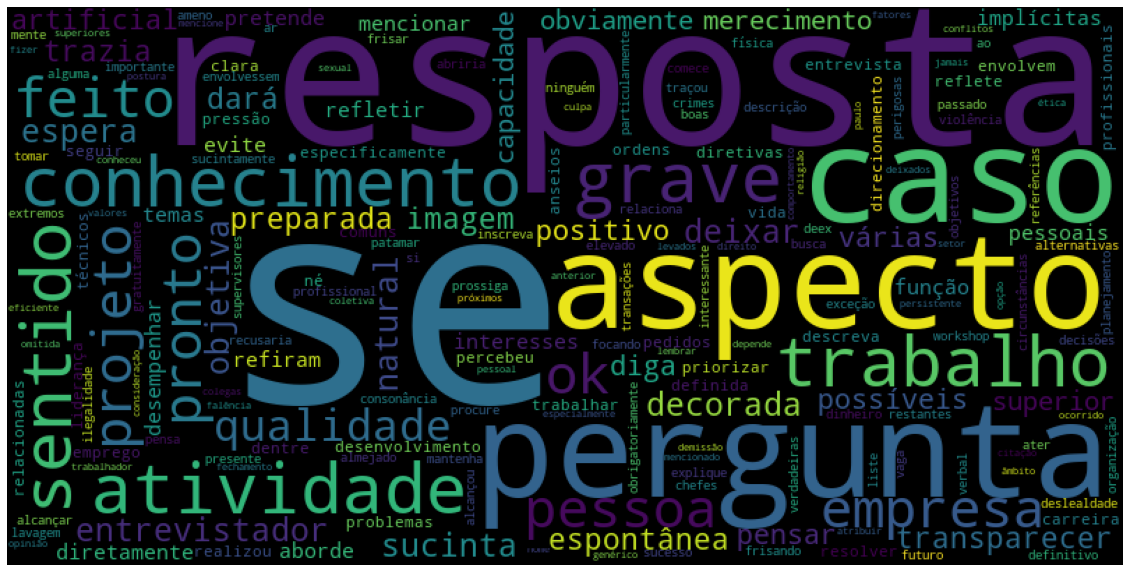

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS, width=800, height=400).generate(', '.join(palavras))
fig, ax = plt.subplots(figsize=(20,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("pesquisa_wordcloud.png")